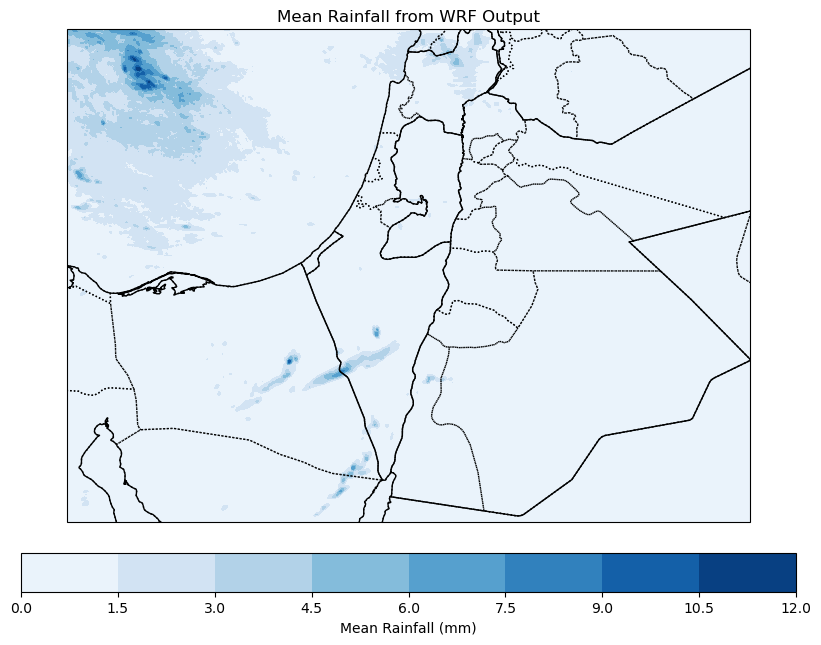

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Open the WRF output file
wrf_file = "G:\matlab_rup_2024\Israel_hail_storm/wrfout_d03_2024-11-01_18_00_00.nc"
data = xr.open_dataset(wrf_file)
# Extract rainfall variables
rainc = data["RAINC"]  # Model cumulative precipitation (convective)
rainnc = data["RAINNC"]  # Model cumulative precipitation (non-convective)

# Calculate total rainfall
total_rain = rainc + rainnc
# Calculate mean rainfall over time
mean_rainfall = total_rain.mean(dim="Time")

# Extract lat/lon for plotting
lat = data["XLAT"].isel(Time=0)  # Latitude
lon = data["XLONG"].isel(Time=0)  # Longitude

# Plot the mean rainfall
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(10, 8))
contour = ax.contourf(lon, lat, mean_rainfall, cmap="Blues", transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=":")

# Add a colorbar
cbar = plt.colorbar(contour, ax=ax, orientation="horizontal", pad=0.05)
cbar.set_label("Mean Rainfall (mm)")

# Title and labels
ax.set_title("Mean Rainfall from WRF Output")
plt.savefig("Mean_rainfall_plot.jpg", dpi=200)
plt.show()